# 形態素解析1

In [1]:
import MeCab

mecab = MeCab.Tagger()

t = mecab.parse("私達は人工知能を作るために勉強する")

print(t)

p = t.split("\n")
for i in p:
    if i == "EOS":
        break
    print(i.split("\t"))

私	ワタクシ	ワタクシ	私-代名詞	代名詞			0
達	タチ	タチ	達	接尾辞-名詞的-一般			
は	ワ	ハ	は	助詞-係助詞			
人工	ジンコー	ジンコウ	人工	名詞-普通名詞-一般			0
知能	チノー	チノウ	知能	名詞-普通名詞-一般			1
を	オ	ヲ	を	助詞-格助詞			
作る	ツクル	ツクル	作る	動詞-一般	五段-ラ行	連体形-一般	2
ため	タメ	タメ	為	名詞-普通名詞-副詞可能			2
に	ニ	ニ	に	助詞-格助詞			
勉強	ベンキョー	ベンキョウ	勉強	名詞-普通名詞-サ変可能			0
する	スル	スル	為る	動詞-非自立可能	サ行変格	終止形-一般	0
EOS

['私', 'ワタクシ', 'ワタクシ', '私-代名詞', '代名詞', '', '', '0']
['達', 'タチ', 'タチ', '達', '接尾辞-名詞的-一般', '', '', '']
['は', 'ワ', 'ハ', 'は', '助詞-係助詞', '', '', '']
['人工', 'ジンコー', 'ジンコウ', '人工', '名詞-普通名詞-一般', '', '', '0']
['知能', 'チノー', 'チノウ', '知能', '名詞-普通名詞-一般', '', '', '1']
['を', 'オ', 'ヲ', 'を', '助詞-格助詞', '', '', '']
['作る', 'ツクル', 'ツクル', '作る', '動詞-一般', '五段-ラ行', '連体形-一般', '2']
['ため', 'タメ', 'タメ', '為', '名詞-普通名詞-副詞可能', '', '', '2']
['に', 'ニ', 'ニ', 'に', '助詞-格助詞', '', '', '']
['勉強', 'ベンキョー', 'ベンキョウ', '勉強', '名詞-普通名詞-サ変可能', '', '', '0']
['する', 'スル', 'スル', '為る', '動詞-非自立可能', 'サ行変格', '終止形-一般', '0']


# 形態素解析2

mori.txt
形態素数: 64095


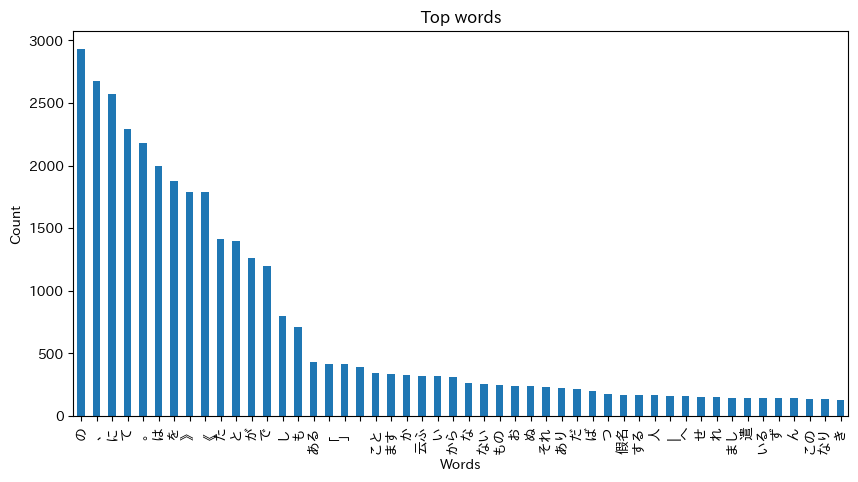

dazai.txt
形態素数: 72963


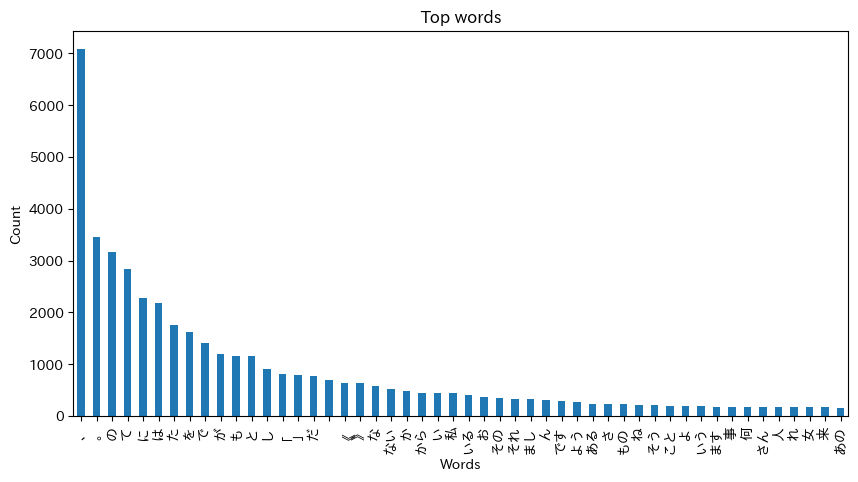

akutagawa.txt
形態素数: 65160


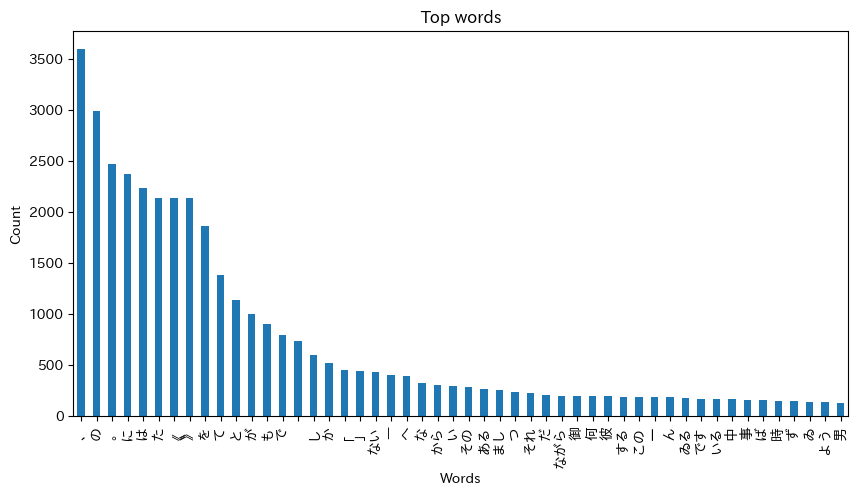

In [1]:
import MeCab
import os
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

mecab = MeCab.Tagger()

text = {}
word = {}
wordCount = {}
files = os.listdir('./dataset')
for file in files:
  with open(f"./dataset/{file}", "r") as f:
    print(file)

    # テキスト読み込み
    text[file] = f.read()
    
    # 形態素解析
    word[file] = []
    wTmp = mecab.parse(text[file]).split("\n")
    for wTmp2 in wTmp:
      if wTmp2 == "EOS":
        break
      word[file].append(wTmp2.split("\t"))
    print(f"形態素数: {len(word[file])}")
    
    # 品詞の出現回数
    wordCount[file] = {}
    for wTmp in word[file]:
      if wTmp[0] not in wordCount[file]:
        wordCount[file][wTmp[0]] = 1
      else:
        wordCount[file][wTmp[0]] += 1

    # データフレーム化
    wordCountDf = pd.Series(wordCount[file])
    wordCountDfTop = wordCountDf.sort_values(ascending=False).head(50)

    # グラフ化
    plt.figure(figsize=(10,5))
    plt.rcParams['font.family'] = 'IPAexGothic'
    wordCountDfTop.plot(kind='bar')
    plt.title('Top words')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.show()
